In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def rgb2gray(_img):
    img = _img.copy().astype(np.float)
    r = img[..., 2].copy()
    g = img[..., 1].copy()
    b = img[..., 0].copy()
    img = 0.2126 * r + 0.7152 * g + 0.0722 * b
    img = img.astype(np.uint8)
    return img

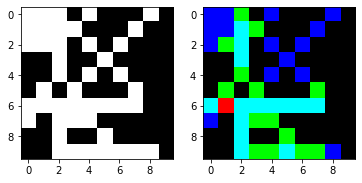

In [3]:
#61
def renketsu4(_img):
    img = _img.copy()
    img = img[..., 0]
    tmp = img.copy()
    tmp[tmp == 255] = 1
    h, w = tmp.shape
    out = np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            if tmp[i, j] == 0:
                continue
            if i == 0 and j == 0:
                s7 = tmp[i+1, j] - tmp[i+1, j] * tmp[i+1, j+1] * tmp[i, j+1]
                img[i, j] = s7 + 1
                continue
            if i == 0 and j == w-1:
                s5 = tmp[i, j-1] - tmp[i, j-1] * tmp[i+1, j-1] * tmp[i+1, j]
                img[i, j] = s5 + 1
                continue
            if i == h-1 and j == 0:
                s1 = tmp[i, j+1] - tmp[i, j+1] * tmp[i-1, j+1] * tmp[i-1, j]
                img[i, j] = s1 + 1
                continue
            if i == h-1 and j == w-1:
                s3 = tmp[i-1, j] - tmp[i-1, j] * tmp[i-1, j-1] * tmp[i, j-1]
                img[i, j] = s3 + 1
                continue
            if i == 0:
                s5 = tmp[i, j-1] - tmp[i, j-1] * tmp[i+1, j-1] * tmp[i+1, j]
                s7 = tmp[i+1, j] - tmp[i+1, j] * tmp[i+1, j+1] * tmp[i, j+1]
                img[i, j] = s5 + s7 + 1
                continue
            if i == h-1:
                s1 = tmp[i, j+1] - tmp[i, j+1] * tmp[i-1, j+1] * tmp[i-1, j]
                s3 = tmp[i-1, j] - tmp[i-1, j] * tmp[i-1, j-1] * tmp[i, j-1]
                img[i, j] = s1 + s3 + 1
                continue
            if j == 0:
                s7 = tmp[i+1, j] - tmp[i+1, j] * tmp[i+1, j+1] * tmp[i, j+1]
                s1 = tmp[i, j+1] - tmp[i, j+1] * tmp[i-1, j+1] * tmp[i-1, j]
                img[i, j] = s7 + s1 + 1
                continue
            if j == w-1:
                s3 = tmp[i-1, j] - tmp[i-1, j] * tmp[i-1, j-1] * tmp[i, j-1]
                s5 = tmp[i, j-1] - tmp[i, j-1] * tmp[i+1, j-1] * tmp[i+1, j]
                img[i, j] = s3 + s5 + 1
                continue
                
            s1 = tmp[i, j+1] - tmp[i, j+1] * tmp[i-1, j+1] * tmp[i-1, j]
            s3 = tmp[i-1, j] - tmp[i-1, j] * tmp[i-1, j-1] * tmp[i, j-1]
            s5 = tmp[i, j-1] - tmp[i, j-1] * tmp[i+1, j-1] * tmp[i+1, j]
            s7 = tmp[i+1, j] - tmp[i+1, j] * tmp[i+1, j+1] * tmp[i, j+1]
            img[i, j] = s1 + s3 + s5 + s7 + 1
            
    out = np.zeros((h, w, 3))
    colors = [[], [0, 0, 255], [0, 255, 0], [0, 255, 255], [255, 0, 0], [255, 0, 255]]
    for i in range(1, 6):
        idx = np.where(img == i)
        out[idx] = colors[i]
    
    out = out.astype(np.uint8)
    return out


img = cv2.imread('renketsu.png')

out = renketsu4(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(out)
plt.show()

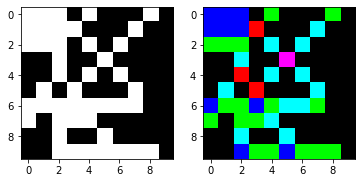

In [4]:
#62
def renketsu8(_img):
    img = _img.copy()
    img = img[..., 0]
    tmp = img.copy()
    tmp[tmp == 255] = 1
    tmp = 1 - tmp
    h, w = tmp.shape
    out = np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            if tmp[i, j] == 1:
                continue
            if i == 0 and j == 0:
                s7 = tmp[i+1, j] - tmp[i+1, j] * tmp[i+1, j+1] * tmp[i, j+1]
                img[i, j] = s7 + 1
                continue
            if i == 0 and j == w-1:
                s5 = tmp[i, j-1] - tmp[i, j-1] * tmp[i+1, j-1] * tmp[i+1, j]
                img[i, j] = s5 + 1
                continue
            if i == h-1 and j == 0:
                s1 = tmp[i, j+1] - tmp[i, j+1] * tmp[i-1, j+1] * tmp[i-1, j]
                img[i, j] = s1 + 1
                continue
            if i == h-1 and j == w-1:
                s3 = tmp[i-1, j] - tmp[i-1, j] * tmp[i-1, j-1] * tmp[i, j-1]
                img[i, j] = s3 + 1
                continue
            if i == 0:
                s5 = tmp[i, j-1] - tmp[i, j-1] * tmp[i+1, j-1] * tmp[i+1, j]
                s7 = tmp[i+1, j] - tmp[i+1, j] * tmp[i+1, j+1] * tmp[i, j+1]
                img[i, j] = s5 + s7 + 1
                continue
            if i == h-1:
                s1 = tmp[i, j+1] - tmp[i, j+1] * tmp[i-1, j+1] * tmp[i-1, j]
                s3 = tmp[i-1, j] - tmp[i-1, j] * tmp[i-1, j-1] * tmp[i, j-1]
                img[i, j] = s1 + s3 + 1
                continue
            if j == 0:
                s7 = tmp[i+1, j] - tmp[i+1, j] * tmp[i+1, j+1] * tmp[i, j+1]
                s1 = tmp[i, j+1] - tmp[i, j+1] * tmp[i-1, j+1] * tmp[i-1, j]
                img[i, j] = s7 + s1 + 1
                continue
            if j == w-1:
                s3 = tmp[i-1, j] - tmp[i-1, j] * tmp[i-1, j-1] * tmp[i, j-1]
                s5 = tmp[i, j-1] - tmp[i, j-1] * tmp[i+1, j-1] * tmp[i+1, j]
                img[i, j] = s3 + s5 + 1
                continue
                
            s1 = tmp[i, j+1] - tmp[i, j+1] * tmp[i-1, j+1] * tmp[i-1, j]
            s3 = tmp[i-1, j] - tmp[i-1, j] * tmp[i-1, j-1] * tmp[i, j-1]
            s5 = tmp[i, j-1] - tmp[i, j-1] * tmp[i+1, j-1] * tmp[i+1, j]
            s7 = tmp[i+1, j] - tmp[i+1, j] * tmp[i+1, j+1] * tmp[i, j+1]
            img[i, j] = s1 + s3 + s5 + s7 + 1
            
    out = np.zeros((h, w, 3))
    colors = [[], [0, 0, 255], [0, 255, 0], [0, 255, 255], [255, 0, 0], [255, 0, 255]]
    for i in range(1, 6):
        idx = np.where(img == i)
        out[idx] = colors[i]
    
    out = out.astype(np.uint8)
    return out


img = cv2.imread('renketsu.png')

out = renketsu8(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(out)
plt.show()

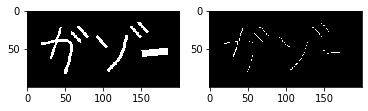

In [5]:
#63
def thining(_img):
    img = _img.copy()
    img = img[..., 0]
    img[img == 255] = 1
    
    k4 = np.array(((0, 1, 0),
                   (1, 0, 1),
                   (0, 1, 0)))
    
    k8 = np.array(((1, 1, 1),
                   (1, 0, 1),
                   (1, 1, 1)))
    
    h, w = img.shape
    cnt = 0
    while cnt == 0:
        tmp = img.copy()
        cnt = 1
        for i in range(h):
            for j in range(w):
                if tmp[i, j] == 0:
                    continue
                if np.sum(tmp[i-1:i+2, j-1:j+2] * k4) == 4:
                    continue
                s1 = tmp[i, j+1] - tmp[i, j+1] * tmp[i-1, j+1] * tmp[i-1, j]
                s3 = tmp[i-1, j] - tmp[i-1, j] * tmp[i-1, j-1] * tmp[i, j-1]
                s5 = tmp[i, j-1] - tmp[i, j-1] * tmp[i+1, j-1] * tmp[i+1, j]
                s7 = tmp[i+1, j] - tmp[i+1, j] * tmp[i+1, j+1] * tmp[i, j+1]
                if s1 + s3 + s5 + s7 != 1:
                    continue
                if np.sum(tmp[i-1:i+2, j-1:j+2] * k8) < 3:
                    continue
                img[i, j] = 0
                cnt = 0
    
    out = np.zeros((h, w, 3))
    idx = np.where(img == 1)
    out[idx] = [255, 255, 255]
    
    out = out.astype(np.uint8)
    return out

img = cv2.imread('gazo.png')

out = thining(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(out)
plt.show()

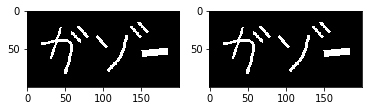

In [14]:
#64 ?????????????????????????????????????
def hilditch(_img):
    def renketsu8(img):
        img = 1 - img
        s1 = img[1, 2] - img[1, 2] * img[0, 2] * img[0, 1]
        s3 = img[0, 1] - img[0, 1] * img[0, 0] * img[1, 0]
        s5 = img[1, 0] - img[1, 0] * img[2, 0] * img[2, 1]
        s7 = img[2, 1] - img[2, 1] * img[2, 2] * img[1, 2]
        return s1 + s3 + s5 + s7
    
    
    img = _img.copy()
    img = img[..., 0]
    img[img == 255] = 1
    
    k4 = np.array(((0, 1, 0),
                   (1, 0, 1),
                   (0, 1, 0)))
    
    k8 = np.array(((1, 1, 1),
                   (1, 0, 1),
                   (1, 1, 1)))
    
    h, w = img.shape
    cnt = 0
    while cnt == 0:
        tmp = img.copy()
        cnt = 1
        for i in range(h):
            for j in range(w):
                if tmp[i, j] == 0:
                    continue
                if np.sum(tmp[i-1:i+2, j-1:j+2] * k4) == 4:
                    continue
                tmp[i-1:i+2, j-1:j+2] = 1 - tmp[i-1:i+2, j-1:j+2]
                s1 = tmp[i, j+1] - tmp[i, j+1] * tmp[i-1, j+1] * tmp[i-1, j]
                s3 = tmp[i-1, j] - tmp[i-1, j] * tmp[i-1, j-1] * tmp[i, j-1]
                s5 = tmp[i, j-1] - tmp[i, j-1] * tmp[i+1, j-1] * tmp[i+1, j]
                s7 = tmp[i+1, j] - tmp[i+1, j] * tmp[i+1, j+1] * tmp[i, j+1]
                tmp[i-1:i+2, j-1:j+2] = 1 - tmp[i-1:i+2, j-1:j+2]
                if s1 + s3 + s5 + s7 != 1:
                    continue
                if np.sum(np.abs(img[i-1:i+2, j-1:j+2] * k8)) < 2:
                    continue
                t = img[i-1:i+2, j-1:j+2] * k8
                if len(t[t == 1]) < 1:
                    continue
                flg1, flg2 = False, True
                t = img[i-1:i+2, j-1:j+2] * k8
                if len(t[t == -1]) == 0:
                    flg1 = True
                for m in range(3):
                    for n in range(3):
                        if renketsu8(tmp[i-2-m:i+1+m, j-2+n:j+1+n]) != 1:
                            flg2 = False
                if flg1 or flg2 == False:
                    continue
                img[i, j] = -1
                cnt = 0
        img[img == -1] = 0
    
    out = np.zeros((h, w, 3))
    idx = np.where(img == 1)
    out[idx] = [255, 255, 255]
    
    out = out.astype(np.uint8)
    return out


img = cv2.imread('gazo.png')

out = hilditch(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(out)
plt.show()

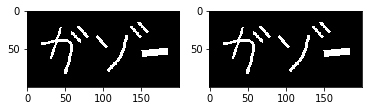

In [19]:
#65 ????????????????????????????????
def zhang_suen(_img):
    img = _img.copy()
    img = img[..., 0]
    img[img == 255] = 0
    img[img == 0] = 1
    tmp = img.copy()
    
    k8 = np.array(((1, 1, 1),
                   (1, 0, 1),
                   (1, 1, 1)))

    h, w = img.shape
    flg = 0
    while(flg == 0):
        flg = 1
        for i in range(1, h-1):
            for j in range(1, w-1):
                if tmp[i, j] == 0:
                    continue
                a = []
                a.append(tmp[i-1, j+1] - tmp[i-1, j])
                a.append(tmp[i, j+1] - tmp[i-1, j+1])
                a.append(tmp[i+1, j+1] - tmp[i, j+1])
                a.append(tmp[i+1, j] - tmp[i+1, j+1])
                a.append(tmp[i+1, j-1] - tmp[i+1, j])
                a.append(tmp[i, j-1] - tmp[i+1, j-1])
                a.append(tmp[i-1, j-1] - tmp[i, j-1])
                a.append(tmp[i-1, j] - tmp[i-1, j-1])
                if len(a[a == 1]) != 1:
                    continue
                t = tmp[i-1:i+2, j-1:j+2] * k8
                if len(t[t == 1] < 2) or 6 < len(t[t == 1]):
                    continue
                if tmp[i-1, j] != 1 and tmp[i, j+1] != 1 and tmp[i+1, j] != 1:
                    continue
                if tmp[i, j+1] != 1 and tmp[i+1, j] != 1 and tmp[i, j-1] != 1:
                    continue
                img[i, j] = 1
                flg = 0
        tmp = img.cppy()
                
        for i in range(1, h-1):
            for j in range(1, w-1):
                if tmp[i, j] == 0:
                    continue
                a = []
                a.append(tmp[i-1, j+1] - tmp[i-1, j])
                a.append(tmp[i, j+1] - tmp[i-1, j+1])
                a.append(tmp[i+1, j+1] - tmp[i, j+1])
                a.append(tmp[i+1, j] - tmp[i+1, j+1])
                a.append(tmp[i+1, j-1] - tmp[i+1, j])
                a.append(tmp[i, j-1] - tmp[i+1, j-1])
                a.append(tmp[i-1, j-1] - tmp[i, j-1])
                a.append(tmp[i-1, j] - tmp[i-1, j-1])
                if len(a[a == 1]) != 1:
                    continue
                t = tmp[i-1:i+2, j-1:j+2] * k8
                if len(t[t == 1] < 2) or 6 < len(t[t == 1]):
                    continue
                if tmp[i-1, j] != 1 and tmp[i, j+1] != 1 and tmp[i, j-1] != 1:
                    continue
                if tmp[i-1, j] != 1 and tmp[i+1, j] != 1 and tmp[i, j-1] != 1:
                    continue
                img[i, j] = 1
                flg = 0
        tmp = img.copy()
                
    out = np.zeros((h, w, 3))
    idx = np.where(img == 0)
    out[idx] = [255, 255, 255]
    
    out = out.astype(np.uint8)
    return out


img = cv2.imread('gazo.png')

out = hilditch(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(out)
plt.show()

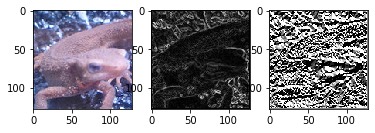

In [4]:
#66
def hog123(_img):
    img = rgb2gray(_img).astype(np.float32)
    h, w = img.shape
    
    gx = np.zeros_like(img)
    gy = np.zeros_like(img)
    for i in range(1, h-1):
        for j in range(1, w-1):
            gx[i, j] = img[i, j+1] - img[i, j-1]
            gy[i, j] = img[i+1, j] - img[i-1, j]
    
    mag = np.sqrt(gx**2 + gy**2)
    gx = np.maximum(gx, 1e-5)
    ang = np.arctan(gy / gx)  # -pi/2 ~ pi/2
    ang = ang * 180 / np.pi + 90  # 0 ~ 180
    
    for i in range(9):
        ang[(20*i <= ang) & (ang <= 20*i+20)] = i
    
    mag = mag.astype(np.uint8)
    ang = ang.astype(np.uint8)
    
    return mag, ang
    
    
img = cv2.imread('imori.jpg')
img = img[..., ::-1]

mag, ang = hog123(img)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(mag, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(ang, cmap='gray')
plt.show()

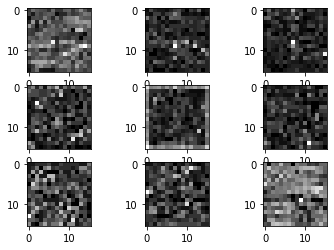

In [5]:
#67
def hog4(_ang, n=8):
    ang = _ang.copy()
    h, w = ang.shape
    hc, wc = h//n, w//n
    out = np.zeros((9, hc, wc))
    
    for y in range(hc):
        for x in range(wc):
            for i in range(n):
                for j in range(n):
                    val = ang[n*y+i, n*x+j]
                    out[val, y, x] += 1
    
    out = out.astype(np.uint8)
    return out
    
    
img = cv2.imread('imori.jpg')
img = img[..., ::-1]

mag, ang = hog123(img)
out = hog4(ang)

# plt.imshow(img)
# plt.show()
plt.subplot(3, 3, 1)
plt.imshow(out[0], cmap='gray')
plt.subplot(3, 3, 2)
plt.imshow(out[1], cmap='gray')
plt.subplot(3, 3, 3)
plt.imshow(out[2], cmap='gray')
plt.subplot(3, 3, 4)
plt.imshow(out[3], cmap='gray')
plt.subplot(3, 3, 5)
plt.imshow(out[4], cmap='gray')
plt.subplot(3, 3, 6)
plt.imshow(out[5], cmap='gray')
plt.subplot(3, 3, 7)
plt.imshow(out[6], cmap='gray')
plt.subplot(3, 3, 8)
plt.imshow(out[7], cmap='gray')
plt.subplot(3, 3, 9)
plt.imshow(out[8], cmap='gray')
plt.show()

In [12]:
def hist_normalization(img, a=0, b=255):
	# get max and min
	c = img.min()
	d = img.max()

	out = img.copy()

	# normalization
	out = (b-a) / (d - c) * (out - c) + a
	out[out < a] = a
	out[out > b] = b
	out = out.astype(np.uint8)
	
	return out

[[[  0  41   2 ...  36   0   0]
  [ 29   0   0 ...   0  30   0]
  [  0   0   0 ...   0   1   0]
  ...
  [ 26   0   0 ...   0  23   0]
  [151  16   2 ...  24   0   0]
  [  0   0   0 ...   0   0   0]]

 [[ 40  42   3 ...  69  50   0]
  [ 12   0   0 ...   0   0 255]
  [ 10   0   0 ...   0   4   0]
  ...
  [ 34   0   0 ...   1  43   0]
  [135  31   1 ...  21 129   0]
  [255   0   0 ...   0   0   0]]

 [[148  47   1 ...  23 172   0]
  [  0   0   0 ...   0  30   0]
  [  8   0   0 ...   0   7   0]
  ...
  [ 15   2   0 ...   0  29   0]
  [191  14   3 ...   0 189 255]
  [  0   0   0 ...   0   0   0]]

 ...

 [[ 53   9   3 ...  10  50   0]
  [  9   0   0 ...   2  55   0]
  [  1   0   0 ...   0   5   0]
  ...
  [ 67   0   0 ...   0  28   0]
  [161  31   5 ...  33 100   0]
  [  0 255   0 ...   0   0   0]]

 [[ 53  10   5 ...   0  54   0]
  [ 39   1   0 ...   1  10   0]
  [  3   0   0 ...   0   2   0]
  ...
  [ 17   0   0 ...   0  48   0]
  [119  20   5 ...  23 255   0]
  [  0   0 255 ...   0   0  

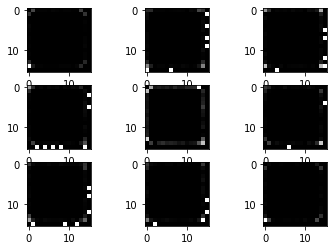

In [15]:
#68
def hog5(_ang, c=3):
    eps = 1
    ang = _ang.copy().astype(np.float32)
    _, h, w = ang.shape
    pad = c // 2
    out = ang.copy()
    
    for n in range(9):
        for i in range(pad, h-c+1):
            for j in range(pad, w-c+1):
                den = np.sqrt(np.sum(ang[n, i-1:i+2, j-1:j+2]) + eps)
                for y in range(c):
                    for x in range(c):
                        out[n, i-1+y, j-1+x] = out[n, i-1+y, j-1+x] / den
    
    out[out > 1] = 0
    out = hist_normalization(out)
    print(out)
    out = out.astype(np.uint8)
    return out
    
    
img = cv2.imread('imori.jpg')
img = img[..., ::-1]

mag, ang = hog123(img)
out = hog4(ang)
out = hog5(out)

# plt.imshow(img)
# plt.show()
plt.subplot(3, 3, 1)
plt.imshow(out[0], cmap='gray')
plt.subplot(3, 3, 2)
plt.imshow(out[1], cmap='gray')
plt.subplot(3, 3, 3)
plt.imshow(out[2], cmap='gray')
plt.subplot(3, 3, 4)
plt.imshow(out[3], cmap='gray')
plt.subplot(3, 3, 5)
plt.imshow(out[4], cmap='gray')
plt.subplot(3, 3, 6)
plt.imshow(out[5], cmap='gray')
plt.subplot(3, 3, 7)
plt.imshow(out[6], cmap='gray')
plt.subplot(3, 3, 8)
plt.imshow(out[7], cmap='gray')
plt.subplot(3, 3, 9)
plt.imshow(out[8], cmap='gray')
plt.show()

In [16]:
#69
def hog():
    pass

In [18]:
def rgb2hsv(_img):
    img = _img.copy() / 255
    hsv = np.zeros_like(img)
    
    _max = np.max(img, axis=2)
    _min = np.min(img, axis=2)
    min_idx = np.argmin(img, axis=2)
    
    #H
    hsv[..., 0][np.where(_max == _min)] = 0
    a = np.where(min_idx == 2)
    hsv[..., 0][a] = (60 * (img[..., 1][a] - img[..., 0][a])) / (_max[a] - _min[a]) + 60
    a = np.where(min_idx == 0)
    hsv[..., 0][a] = (60 * (img[..., 2][a] - img[..., 1][a])) / (_max[a] - _min[a]) + 180
    a = np.where(min_idx == 1)
    hsv[..., 0][a] = (60 * (img[..., 0][a] - img[..., 2][a])) / (_max[a] - _min[a]) + 300
    
    #S
    hsv[..., 1] = _max - _min
    
    #V
    hsv[..., 2] = _max
    
    return hsv

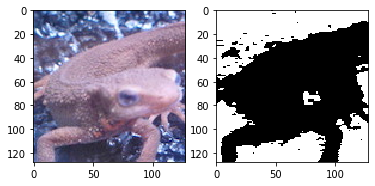

In [25]:
#70
def color_tracking(_img):
    img = rgb2hsv(_img)
    tmp = img[..., 0]
    out = np.zeros_like(tmp)
    out[(180 <= tmp) & (tmp <= 260)] = 255
    out = out.astype(np.uint8)
    return out


img = cv2.imread('imori.jpg')
img = img[..., ::-1]

out = color_tracking(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(out, cmap='gray')
plt.show()